In [1]:
%run ../code/helper_functions.ipynb

# MODELING

In [2]:
# Reading in our training data that we have cleaned

df = pd.read_csv("../data/train_CLEAN.csv")

In [3]:
# features list
features = ['age', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week', 'is_usa',
       'is_top7_occ','is_married', 'is_male',
       'is_high_ed']

# target variable
target = 'wage'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### Baseline Model

In [4]:
# Our baseline score to measure our stats against

y_train.value_counts(normalize=True)

0    0.759173
1    0.240827
Name: wage, dtype: float64

### Set up Pipelines & Instantiate Models for a Gridsearch

In [5]:
gsc = GridSearchContainer(X,y)

In [6]:
# Logistic Regression
lr = LogisticRegression()

# K-Nearest Neighbors Classifier
knn = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Decision Tree Classifier
dt = DecisionTreeClassifier()

# Bagged Trees Classifier
bag = BaggingClassifier()

# Random Forest Classifier
rf = RandomForestClassifier()

# Support Vector Classifier
svc = Pipeline([
    ('ss', StandardScaler()),
    ('svc', SVC())
])

# Ada Boost Classifier
ada = AdaBoostClassifier()

In [7]:
# Get train and test accuracies with each model using default parameters
get_accuracy(lr, "Logistic Regression", X_train, X_test, y_train, y_test)
get_accuracy(knn, "KNeighbors", X_train, X_test, y_train, y_test)
get_accuracy(dt, "Decision Tree", X_train, X_test, y_train, y_test)
get_accuracy(bag, "Bagged Trees", X_train, X_test, y_train, y_test)
get_accuracy(rf, "Random Forest", X_train, X_test, y_train, y_test)
get_accuracy(svc, "Support Vector", X_train, X_test, y_train, y_test)

/Users/nlonberg/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression:
Train: 0.8162571662571663
Test: 0.8210293575727797

KNeighbors:
Train: 0.8744881244881245
Test: 0.8374892519346517

Decision Tree:
Train: 0.9362407862407862
Test: 0.8243459034516644

Bagged Trees:
Train: 0.9294430794430795
Test: 0.8346640461859722

Random Forest:
Train: 0.9361998361998362
Test: 0.8424026532367032

Support Vector:
Train: 0.8507780507780508
Test: 0.8527207959710109



In [8]:
# Set up parameter grids for grid search

params_lr = {
    'C' : [0.1, 1.0, 10],
    'fit_intercept' : [True, False],
    'intercept_scaling' : [1],
    'class_weight' : [None, 'balanced'],
    'random_state' : [42],
    'solver' : ['liblinear']
}

params_dt = {
    'max_depth' : [None],
#    'min_samples_split' : [0.1, 0.5, 1.0],
    'min_samples_leaf' : [1, 2, 3],
    'ccp_alpha' : np.linspace(0,5,50)
}

params_rf = {
    'n_estimators' : [100],
    'max_depth' : [None],
#    'min_samples_split' : [1, 2, 3],
    'min_samples_leaf' : [1, 2, 3],
    'ccp_alpha' : [0.0, 5, 50, 500]
}

params_bag = {
    'n_estimators' : [5, 10, 100]
}

params_knn = {
    'knn__n_neighbors' : [1, 3, 5, 11, 21],
    'knn__weights' : ['uniform', 'distance'],
    'knn__leaf_size' : [30],
    'knn__p' : [1, 2]
}


params_svc = {
    'svc__C' : [0.1, 1, 10],
    'svc__kernel' : ['linear', 'rbf']
}

In [9]:
# Add Logistic Regression to GridSearchContainer
gsc.search(lr, params_lr, mod_name="logreg")
# Check best models
gsc.model_df.head()

Train accuracy: 0.8441850941850941
Test accuracy: 0.8497727551897801


,C,class_weight,fit_intercept,intercept_scaling,random_state,solver,accuracy
logreg_0,10,None,True,1,42,liblinear,0.843735


In [10]:
# Add Decision Tree to GridSearchContainer
gsc.search(dt, params_dt, mod_name="decision_tree")
# Check best models
gsc.model_df.head()

Train accuracy: 0.8997542997542998
Test accuracy: 0.8410514678786389


,C,class_weight,fit_intercept,intercept_scaling,random_state,solver,accuracy,ccp_alpha,max_depth,min_samples_leaf
logreg_0,10.0,NaN,True,1.0,42.0,liblinear,0.843735,NaN,NaN,NaN
decision_tree_1,NaN,NaN,NaN,NaN,NaN,NaN,0.837346,0.0,NaN,3.0


In [11]:
# Add Bagged Trees to GridSearchContainer
gsc.search(bag, params_bag, mod_name="bagged_trees")
# Check best models
gsc.model_df.head()

Train accuracy: 0.9361998361998362
Test accuracy: 0.838471932195062


,C,class_weight,fit_intercept,intercept_scaling,random_state,solver,accuracy,ccp_alpha,max_depth,min_samples_leaf,n_estimators
logreg_0,10.0,NaN,True,1.0,42.0,liblinear,0.843735,NaN,NaN,NaN,NaN
decision_tree_1,NaN,NaN,NaN,NaN,NaN,NaN,0.837346,0.0,NaN,3.0,NaN
bagged_trees_2,NaN,NaN,NaN,NaN,NaN,NaN,0.836446,NaN,NaN,NaN,100.0


In [12]:
# Add KNN to GridSearchContainer
gsc.search(knn, params_knn, mod_name="knn")
# Check best models
gsc.model_df.head()

Train accuracy: 0.8550778050778051
Test accuracy: 0.8474388895713058


,C,class_weight,fit_intercept,intercept_scaling,random_state,solver,accuracy,ccp_alpha,max_depth,min_samples_leaf,n_estimators,knn__leaf_size,knn__n_neighbors,knn__p,knn__weights
logreg_0,10.0,NaN,True,1.0,42.0,liblinear,0.843735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
knn_3,NaN,NaN,NaN,NaN,NaN,NaN,0.842506,NaN,NaN,NaN,NaN,30.0,21.0,1.0,uniform
decision_tree_1,NaN,NaN,NaN,NaN,NaN,NaN,0.837346,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
bagged_trees_2,NaN,NaN,NaN,NaN,NaN,NaN,0.836446,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN


In [13]:
# Add SVC to GridSearchContainer
gsc.search(svc, params_svc, mod_name="SVC")
# Check best models
gsc.model_df.head()

Train accuracy: 0.8507780507780508
Test accuracy: 0.8527207959710109


,C,class_weight,fit_intercept,intercept_scaling,random_state,solver,accuracy,ccp_alpha,max_depth,min_samples_leaf,n_estimators,knn__leaf_size,knn__n_neighbors,knn__p,knn__weights,svc__C,svc__kernel
SVC_4,NaN,NaN,NaN,NaN,NaN,NaN,0.847461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,rbf
logreg_0,10.0,NaN,True,1.0,42.0,liblinear,0.843735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
knn_3,NaN,NaN,NaN,NaN,NaN,NaN,0.842506,NaN,NaN,NaN,NaN,30.0,21.0,1.0,uniform,NaN,NaN
decision_tree_1,NaN,NaN,NaN,NaN,NaN,NaN,0.837346,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bagged_trees_2,NaN,NaN,NaN,NaN,NaN,NaN,0.836446,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Add Random Forest to GridSearchContainer
gsc.search(rf, params_rf, mod_name="random_forest")
# Check best models
gsc.model_df.head(6)

Train accuracy: 0.8880835380835381
Test accuracy: 0.8636531138680752


,C,class_weight,fit_intercept,intercept_scaling,random_state,solver,accuracy,ccp_alpha,max_depth,min_samples_leaf,n_estimators,knn__leaf_size,knn__n_neighbors,knn__p,knn__weights,svc__C,svc__kernel
random_forest_5,NaN,NaN,NaN,NaN,NaN,NaN,0.857248,0.0,NaN,3.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
SVC_4,NaN,NaN,NaN,NaN,NaN,NaN,0.847461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,rbf
logreg_0,10.0,NaN,True,1.0,42.0,liblinear,0.843735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
knn_3,NaN,NaN,NaN,NaN,NaN,NaN,0.842506,NaN,NaN,NaN,NaN,30.0,21.0,1.0,uniform,NaN,NaN
decision_tree_1,NaN,NaN,NaN,NaN,NaN,NaN,0.837346,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bagged_trees_2,NaN,NaN,NaN,NaN,NaN,NaN,0.836446,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN


Our GridSearched Random Forest had the best score (cross validation) and had very low variance.  We will use it as our final model.

### Model Evaluation

In [15]:
# Look at our baseline model again
y_train.value_counts(normalize=True)

0    0.759173
1    0.240827
Name: wage, dtype: float64

In [16]:
# Grab best model from GridSearchContainer
best_models = gsc.best_models
best_model = best_models[-1][0]
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

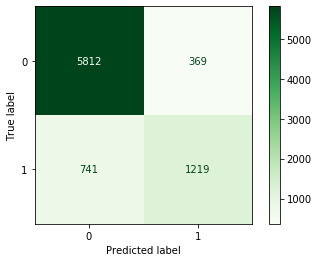

In [18]:
# Display and save confusion matrix
plot_confusion_matrix(best_model, X_test, y_test, cmap='Greens', values_format='d');
plt.savefig("../images/confusion_matrix.png", transparent = True)

In [20]:
y_preds = best_model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()
# FOR VERIFICATION AND INTERPRETABILITY OF ABOVE
print('False'.center(40, "-"))
print(f'(0,0) True Negative - {tn}')
print(f'(0,1) False Positive - {fp}')
print('True'.center(40, "-"))
print(f'(1,0) False Negative - {fn}')
print(f'(1,1) True Positive - {tp}')

-----------------False------------------
(0,0) True Negative - 5812
(0,1) False Positive - 369
------------------True------------------
(1,0) False Negative - 741
(1,1) True Positive - 1219


In [21]:
# Model Prediction
print(f'Model Predicted Score: {(tn + tp) / (tn + tp + fn + fp)}')
print()

# Calculate the specificity
spec = tn / (tn + fp)
print(f'Specificity: {spec} - Our goal was to maximize this metric in order to best predict individuals that earn under $50,000 in wages.')
print()

# Sensitivity
sens = tp / (tp + fn)
print(F'Sensitivity: {sens} - Our model did not do well in predicting individuals that make over $50,000 in wages')
print()

# Precision
prec = tp / (tp + fp)
print(f'Precision: {prec} - ')

Model Predicted Score: 0.8636531138680752

Specificity: 0.9403009221808769 - Our goal was to maximize this metric in order to best predict individuals that earn under $50,000 in wages.

Sensitivity: 0.621938775510204 - Our model did not do well in predicting individuals that make over $50,000 in wages

Precision: 0.767632241813602 - 


### Export Test CSV

In [22]:
# Read in testing data
df_test = pd.read_csv("../data/test_data.csv")

In [23]:
# Data Cleaning and Feature Extraction

df_test['is_usa'] = df_test['native-country'].apply(lambda a: int(a==' United-States'))

df_test["is_top7_occ"] = df_test["occupation"].apply(lambda a: int(a==' Exec-managerial'
                                                       or a==' Prof-specialty'
                                                       or a==' Protective-serv'
                                                       or a==' Tech-support'
                                                       or a==' Sales'
                                                       or a==' Craft-repair'
                                                       or a==' Transport-moving'))

df_test["is_high_ed"] = df_test["education"].apply(lambda a: int(a==' Doctorate'
                                                       or a==' Prof-school'
                                                       or a==' Bachelors'
                                                       or a==' Masters'))

df_test["is_married"] = df_test["marital-status"].apply(lambda a: int(a==' Married-civ-spouse' or a==' Married-AF-spouse'))

df_test["is_male"] = df_test["sex"].apply(lambda a: int(a==' Male'))

In [24]:
features = ['age', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week', 'is_usa',
       'is_top7_occ','is_married', 'is_male',
       'is_high_ed']

X_final_test = df_test[features]

preds = best_model.predict(X_final_test)

final_df = pd.DataFrame({"wage_predictions": preds})

In [25]:
final_df.head()

,wage_predictions
0,0
1,0
2,0
3,1
4,0


In [26]:
final_df.to_csv("../data/test_predictions.csv",index=False)